In [1]:
#!/usr/bin/env python
# -*- coding: utf-8 -*-

In [2]:
import pandas as pd
import codecs
import numpy as np
import matplotlib.pyplot as plt

In [9]:
#snssns..set_styleset_sty ('whitegrid')
%matplotlib inline

pd.set_option("display.max_columns", 200) # 表示カラムの最大値
pd.set_option('display.max_rows', 20) # 表示行数の最大値
pd.set_option('display.max_colwidth', 30)
pd.set_option("display.float_format", '{:.2f}'.format) # 小数点以下の有効数字

# jupyterの幅を自動調整
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:90% !important; }</style>"))

### データ読み込み

In [63]:
with codecs.open("../01.data/cfd_result_2017.csv", "r", "Shift-JIS", "ignore") as file:
    data = pd.read_csv(file, header=2, parse_dates=True, dtype={'終値' : str} )
    # カラム名を設定
    data.columns = ['xxx', 'yyy', 
                'trading_day', 'aaa','price_start', 'price_high',  'price_low', 'price_close', 'bbb',
                'price_end_diff_N1', 'ccc', 'ddd', 'eee', 'fff']
    #  カラムを除外する
    data = data.drop(['xxx', 'yyy', 'aaa', 'bbb', 'ccc', 'ddd', 'eee', 'fff'], axis=1)

data = data.set_index('trading_day')

data['price_start'] = data['price_start'].str.replace(',', '').astype(int)
data['price_high'] = data['price_high'].str.replace(',', '').astype(int)
data['price_low'] = data['price_low'].str.replace(',', '').astype(int)
data['price_close'] = data['price_close'].str.replace(',', '').astype(int)

In [64]:
data.head()

,price_start,price_high,price_low,price_close,price_end_diff_N1
trading_day,,,,,
2017-01-03,19234,19432,19147,19304,267.00
2017-01-04,19310,19678,19268,19647,334.00
2017-01-05,19632,19657,19370,19439,-208.00
2017-01-06,19415,19634,19318,19592,153.00
2017-01-09,19585,19709,19415,19445,-147.00


In [65]:
data.dtypes

price_start            int64
price_high             int64
price_low              int64
price_close            int64
price_end_diff_N1    float64
dtype: object

## 移動平均

In [70]:
data['MA25'] = data['price_close'].rolling(25).mean()
data['MA50'] = data['price_close'].rolling(50).mean()
data['MA75'] = data['price_close'].rolling(75).mean()

In [72]:
data.tail()

,price_start,price_high,price_low,price_close,price_end_diff_N1,MA25,MA50,MA75
trading_day,,,,,,,,
2017-12-25,22984,23014,22921,22972,7.00,22731.96,22455.84,21797.75
2017-12-26,22980,23010,22921,22986,14.00,22744.16,22488.16,21839.45
2017-12-27,22925,23018,22909,22968,-18.00,22765.72,22518.56,21880.61
2017-12-28,22966,23009,22774,22868,-100.00,22782.60,22548.96,21920.60
2017-12-29,22892,22954,22770,22800,-68.00,22787.72,22573.98,21958.20


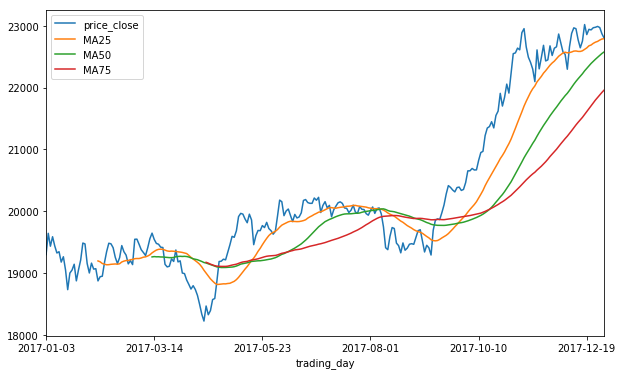

In [80]:
data[['price_close', 'MA25', 'MA50', 'MA75' ]].plot(figsize=(10,6))

### ボリンジャーバンド

In [104]:
#Bolinger Band
Bands_period = 25 #期間
Deviation = 1 #偏差の倍率

Base = data['price_close'].rolling(Bands_period).mean()
sigma = data['price_close'].rolling(Bands_period).std(ddof=0)
Upper = Base +sigma*Deviation
Lower = Base -sigma*Deviation
Upper2 = Base + 2*sigma*Deviation
Lower2 = Base -  2*sigma*Deviation



In [105]:
data['BLGR_sigma_p'] = Upper
data['BLGR_2sigma_p'] = Upper2
data['BLGR_sigma_m'] = Lower
data['BLGR_2sigma_m'] = Lower2

# 'BLGR_2sigma_p','BLGR_sigma_m','BLGR_2sigma_m',

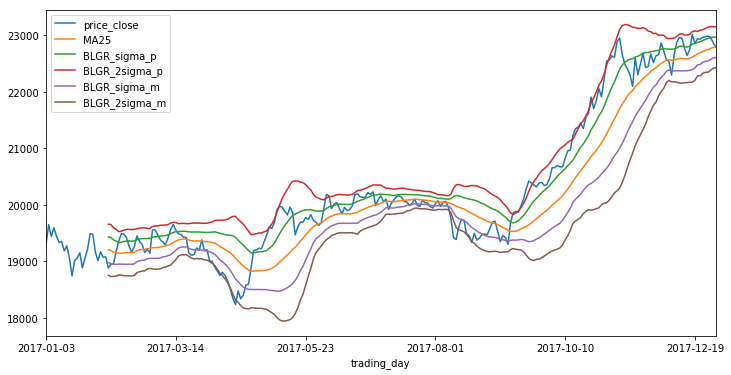

In [107]:
data[['price_close', 'MA25', 'BLGR_sigma_p', 'BLGR_2sigma_p', 'BLGR_sigma_m', 'BLGR_2sigma_m']].plot(figsize=(12, 6))